<a href="https://colab.research.google.com/github/BeverlyHuang/Digit-Classification/blob/master/422_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time and Resources for Digit Classification 

Team 2: Beverly Huang, Chloe Liu, Fangqi Zhao, Xinyu Zhang, Luis Pulgar

##Import packages

In [0]:
import pandas as pd
from pandas import Series,DataFrame
from sklearn.linear_model import LogisticRegression
from time import time
import matplotlib.pyplot as plt

In [0]:
! pip install line-profiler
! pip install psutil
! pip install memory_profiler

    100% |████████████████████████████████| 92kB 5.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/05/7d/9b/aafbe8d78dc2b2c644d2efd2f060ab3258143860142575193a
Successfully built line-profiler
    100% |████████████████████████████████| 40kB 4.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/f0/ff/63/fdbff3f1e1b76ad4eae491dd5b190902906b093e93eb86dd5a
Successfully built memory-profiler


In [0]:
%load_ext memory_profiler

##Load data

In [0]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist=input_data.read_data_sets("MNIST")

train_images = pd.DataFrame(mnist.train.images)
train_labels = pd.DataFrame(mnist.train.labels)
test_images = pd.DataFrame(mnist.test.images)
test_labels = pd.DataFrame(mnist.test.labels)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
train_labels.head()

,0
0,7
1,3
2,4
3,6
4,1


In [0]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Hardware

**Characteristics of hardware:**
The machine we are running this on has the following hardware characteristics:

Processor: Intel Core i7

Litography: 14 nm

Number of Cores: 6

Number of Threads: 12

Processor Base Frequency: 2.60 GHz

Max Turbo Frequency: 4.30 GHz

Cache: 9 MB SmartCache

Bus Speed: 8 GT/s DMI

TDP: 45 W

Configurable TDP-down: 35 W

Max Memory Size: 64 GB

Max Number of Memory Channels: 2

Max Memory Bandwidth: 41.8 GB/s

Storage: 512 GB of Storage

Memory: 16GB of 2400MHz DDR4 onboard memory

Graphics: Radeon Pro 560X with 4GB of GDDR5 memory and automatic graphics switching and Intel UHD Graphics 630


##Modeling

In [0]:
classifier = LogisticRegression()

###Time Execution

Time complexity of logistic regression:

    Train  - O((f+1)csE)
    Test - O((f+1)cs)

* f is feature number;

* c is the output classess number;

* s is sample size and;

* E is number of epochs you are willing to run the gradient descent.


1.   With current training and testing data set, time excution of training phase is 1 loop, best of 3: 2min 10s per loop; and for testing phase is 10 loops, best of 3: 48.5 ms per loop;
2.   To handle 60B trainig data, the eastimate time according to above time complexity is 471,000B seconds; and for 10B testing data, the estimate time is 78,500B seconds.





####Time execution of training phase

In [0]:
print("Time execution of training phase")
%timeit classifier.fit(train_images, train_labels)

Time execution of training phase


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A c

1 loop, best of 3: 2min 10s per loop


####Time execution of testing phase

In [0]:
print("Time execution of testing phase")
%timeit classifier.predict(test_images)

Time execution of testing phase
10 loops, best of 3: 48.5 ms per loop


####Training and Testing Time vs Data Size

In [0]:
inputnum = {"inputcnt": list(range(10,5000,5))}
df_time = DataFrame(inputnum)
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 1 columns):
inputcnt    998 non-null int64
dtypes: int64(1)
memory usage: 7.9 KB


In [0]:
train_time = []
test_time = []
for i in df_time["inputcnt"]:
  start = time()
  classifier.fit(train_images[:i], train_labels[:i])
  end = time()
  a = end - start
  train_time.append(a)
  starts = time()
  classifier.predict(test_images[:i])
  ends = time()
  b = ends - starts
  test_time.append(b)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A c

In [0]:
df_time['traintime'] = train_time
df_time['testtime'] = test_time

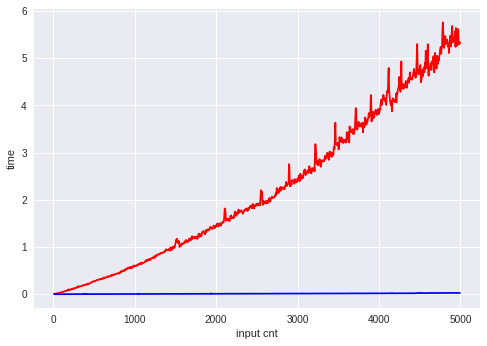

In [0]:
plt.plot(df_time["inputcnt"], df_time['traintime'], color="r")#, linestyle="-", marker="^", linewidth=1)

plt.plot(df_time["inputcnt"], df_time['testtime'], color="b")#, linestyle="-", marker="s", linewidth=1)

plt.xlabel("input cnt")
plt.ylabel("time")

plt.show()

### Memory Usage

Space Complexity of logistic regression：

    O(n*k + k)  
 

* k is dimention;
* n is sample size


1.   With current training and testing data set, memory usage of training phase is 1040.27 MiB, increment: 0.13 MiB; and for testing phase is 1040.29 MiB, increment: 0.01 MiB;
2.   To handle 60B trainig data, the eastimate memory according to above space complexity is 47040B MiB; and for 10B testing data, the estimate time is 7,840B MiB.

#### Memory usage of training phase

In [0]:
print("Memory usage of training phase")
%memit classifier.fit(train_images, train_labels)

Memory usage of training phase


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


peak memory: 1040.27 MiB, increment: 0.13 MiB


####Memory usage of testing phase

In [0]:
print("Memory usage of testing phase")
%memit classifier.predict(test_images)

Memory usage of testing phase
peak memory: 1040.29 MiB, increment: 0.01 MiB
